### Objetivo
Neste notebook é realizada a análise exploratória dos dados com o objetivo de compreender o comportamento das variáveis, identificar possíveis problemas de qualidade (valores ausentes, outliers, assimetrias) e levantar insumos relevantes para as etapas de pré-processamento e modelagem do problema de credit scoring.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float_format", "{:.4f}".format)

RANDOM_STATE = 42
DATA_PATH = "../data/raw/dataset.csv"


#### #1 Verificando a estrutura do dataset
Nesta etapa é realizada uma visão geral da base de dados, incluindo número de registros, quantidade de variáveis, tipos das colunas e proporção da variável target, com o objetivo de compreender a estrutura inicial do dataset e identificar possíveis desequilíbrios relevantes para a modelagem.

In [4]:
df = pd.read_csv(DATA_PATH)
df.head()

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_31,VAR_32,VAR_33,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
0,1,201404,0,0.0000,0.0000,0.0000,0.0000,124.5400,3277.0000,51.9800,NaN,500.0000,153.0000,NaN,299.0000,73.2600,1024.0000,26.9800,162.0000,3000.0000,72.0000,45.0000,8,1279.0000,63.0000,77.6700,492.8400,12.0000,845.0000,NaN,12.0000,16.0000,500.0000,22.0000,0.1338,18.0000,NaN,NaN,0.0000,16.0000,220.8400,348.0000,9.0000,9.5700,33.0000,19.0000,11.0000,512.8200,36.0000,0.0000,16.0000,0.0000,159.2800,379.0000,53.9700,3380.0000,500.0000,159.2800,159.2800,45,369.0000,95.5400,-0.0305,0.0000,2508.0000,159.2800,0,1303.7900,8.0000,-69.0000,16.0000,156.3800,7.5200,0.0000,151.0000,0.0000,3.0000,477.8400,173.0600,0.0000,3.0000
1,2,201407,0,64.0000,0.0000,2.0000,1.0000,47.9200,2443.0000,84.7200,NaN,1000.0000,649.0000,NaN,224.0000,38.5300,NaN,NaN,84.0000,NaN,50.0000,18.0000,12,1063.0000,31.0000,177.3900,335.4400,9.0000,NaN,842.0000,10.0000,NaN,1000.0000,14.0000,0.1338,13.0000,NaN,NaN,NaN,NaN,338.9000,179.0000,5.0000,NaN,NaN,19.0000,9.0000,269.7100,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,1000.0000,2000.0000,NaN,NaN,60,228.0000,97.7300,0.3573,NaN,836.0000,NaN,0,1486.2600,24.0000,NaN,NaN,707.8400,NaN,NaN,187.0000,NaN,NaN,NaN,184.6900,54.0000,NaN
2,3,201405,0,99.0000,2.0000,2.0000,2.0000,80.3800,1824.0000,26.6300,NaN,1893.3500,346.0000,29.9800,106.0000,NaN,NaN,73.5500,8.0000,NaN,3.0000,2.0000,12,116.0000,4.0000,140.2500,362.7100,3.0000,NaN,597.0000,5.0000,NaN,1893.3500,NaN,0.1338,2.0000,NaN,59.9700,NaN,NaN,133.1700,NaN,4.0000,NaN,NaN,3.0000,12.0000,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,294.2000,1893.3500,1893.3500,NaN,NaN,31,264.0000,294.5700,-0.4118,NaN,NaN,NaN,0,800.2700,18.0000,NaN,NaN,471.8600,NaN,NaN,96.0000,NaN,NaN,NaN,732.0000,121.9800,NaN
3,4,201412,0,0.0000,0.0000,0.0000,0.0000,10.5800,3796.0000,NaN,NaN,3000.0000,119.0000,NaN,NaN,NaN,1609.0000,NaN,36.0000,1500.0000,17.0000,11.0000,12,255.0000,14.0000,29.9900,74.0600,0.0000,1238.0000,NaN,0.0000,5.0000,3000.0000,12.0000,0.1338,3.0000,NaN,NaN,0.0000,-1.0000,NaN,NaN,5.0000,NaN,7.0000,NaN,6.0000,NaN,7.0000,0.0000,NaN,NaN,NaN,594.0000,NaN,3000.0000,7000.0000,287.3100,NaN,76,49.0000,NaN,0.7216,5.7500,NaN,287.3100,0,NaN,4.0000,-133.0000,NaN,119.9600,23.0000,0.0000,417.0000,0.0000,0.0000,NaN,NaN,0.0000,0.0000
4,5,201403,1,0.0000,0.0000,0.0000,0.0000,70.4600,437.0000,40.6900,10.9900,2000.0000,NaN,62.7800,NaN,NaN,288.0000,29.5800,NaN,NaN,NaN,0.0000,12,NaN,0.0000,NaN,493.2200,0.0000,43.0000,NaN,0.0000,-9.0000,2000.0000,0.0000,0.0906,0.0000,10.9900,313.9100,0.0000,-9.0000,326.8900,NaN,0.0000,0.0000,-9.0000,NaN,0.0000,NaN,-9.0000,NaN,-16.0000,0.0000,182.8900,288.0000,147.9400,2946.2900,2946.2900,182.8900,182.8900,38,332.0000,NaN,-0.2317,NaN,NaN,NaN,1,1457.7800,NaN,-272.0000,-16.0000,NaN,NaN,0.0000,75.0000,0.0000,0.0000,914.4500,NaN,NaN,0.0000


In [5]:
print(f'Shape:{df['id'].nunique(), df.shape[0]}')

Shape:(10738, 10738)


In [7]:
df.describe()

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_31,VAR_32,VAR_33,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
count,10738.0000,10738.0000,10738.0000,10322.0000,10322.0000,10322.0000,10322.0000,6678.0000,10647.0000,6106.0000,5905.0000,10738.0000,5173.0000,5754.0000,3541.0000,5520.0000,5197.0000,5684.0000,3631.0000,6237.0000,3615.0000,10677.0000,10738.0000,3615.0000,10677.0000,5173.0000,6678.0000,10677.0000,5197.0000,4804.0000,10677.0000,4793.0000,10690.0000,4907.0000,10738.0000,10677.0000,5905.0000,5754.0000,3470.0000,4628.0000,6106.0000,5520.0000,10677.0000,3714.0000,4976.0000,3541.0000,10677.0000,5520.0000,5087.0000,3633.0000,4346.0000,3442.0000,4129.0000,5197.0000,5684.0000,8979.0000,9463.0000,3878.0000,3824.0000,10738.0000,6678.0000,6187.0000,10738.0000,3080.0000,2361.0000,3493.0000,10738.0000,8499.0000,5173.0000,4595.0000,4129.0000,5173.0000,2479.0000,5197.0000,10647.0000,5197.0000,5197.0000,3714.0000,6187.0000,5173.0000,5197.0000
mean,5369.5000,201406.4235,0.2913,32.9992,0.3723,0.2857,0.5762,92.5880,1489.1493,67.8446,71.0239,1156.5013,459.6716,69.3015,457.3691,89.9571,601.4583,66.2215,88.5784,2382.8498,57.1881,7.8227,10.4348,1258.2667,10.3386,128.0257,377.0082,2.3283,351.8665,415.3316,2.8936,7.7624,1714.8360,13.5568,0.1156,2.5159,299.5133,288.8768,3.8469,5.9471,278.2039,323.0712,3.2526,4.0072,10.4731,18.6035,4.0990,370.9382,12.2438,76.5097,3.1447,4.0047,200.7314,361.9571,268.9786,2343.6224,1800.7525,198.9986,202.6223,45.9633,329.1512,308.9482,0.0163,3.4172,1255.2393,194.3311,0.6071,1206.6903,17.6304,-213.1404,0.6353,528.2721,4.8891,0.4308,163.0633,0.4237,0.6271,635.8896,476.5591,64.9674,0.6213
std,3099.9379,3.3760,0.4544,46.3677,1.2586,0.8669,1.2137,78.1100,7336.9010,57.1245,70.2048,663.6445,379.4601,62.6575,390.0399,77.1414,402.5048,54.8797,105.1349,2218.0512,67.2470,16.3065,2.7431,1395.9301,20.4520,110.9975,309.6133,3.8682,389.0283,269.0954,4.5179,20.9429,1499.9536,25.5334,0.0280,5.7158,288.1976,268.9280,5.7808,23.2127,240.1849,262.9709,4.1687,5.5374,24.1607,16.3719,4.8566,305.0231,29.1006,239.3941,27.3018,5.8886,92.1305,216.0817,235.1384,2378.2164,1639.7952,88.5291,94.0263,12.8475,266.9388,260.5881,0.3354,5.2102,1062.4590,85.8853,0.4884,1420.2690,15.2639,494.3618,28.1307,432.2531,7.2754,1.1544,306.9262,1.1479,1.5433,623.1230,572.3082,102.1595,1.5391
min,1.0000,201401.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9800,-94.0000,0.0100,0.9800,150.0000,3.0000,0.0100,5.0000,0.9900,5.0000,0.5000,0.0000,26.0000,1.0000,0.0000,3.0000,1.0000,0.0000,3.1500,0.9800,0.0000,-4.0000,1.0000,0.0000,-338.0000,150.0000,0.0000,-0.1510,0.0000,0.9800,0.0100,0.0000,-342.0000,0.0100,1.0000,0.0000,0.0000,-278.0000,1.0000,0.0000,0.9900,-304.0000,0.0000,-337.0000,0.0000,32.3200,2.0000,0.5000,19.3800,11.9000,32.3200,32.3200,18.0000,1.0000,0.0000,-0.6907,0.0000,418.0000,32.3200,0.0000,0.0000,1.0000,-6582.0000,-337.0000,3.1500,0.0000,0.0000,-104.0000,0.0000,0.0000,32.3200,-876.2200,0.0000,0.0000
25%,2685.2500,201404.0000,0.0000,0.0000,0.0000,0.0000,0.0000,41.2425,446.0000,30.2700,31.4100,650.0000,206.0000,30.5450,198.0000,40.2300,314.0000,30.0000,12.0000,1000.0000,15.0000,0.0000,10.0000,349.0000,0.0000,53.6000,171.3375,0.0000,25.0000,186.0000,0.0000,0.0000,800.0000,0.0000,0.0906,0.0000,110.3500,109.4925,0.0000,0.0000,111.9625,147.0000,0.0000,0.0000,1.0000,7.0000,0.0000,165.8275,1.0000,0.0000,-1.0000,0.0000,138.3100,228.0000,109.9700,901.0900,800.0000,139.8494,138.5925,36.0000,153.0000,118.5800,-0.2317,0.0000,418.0000,137.4200,0.0000,368.6150,7.0000,-162.0000,-2.0000,238.4300,0.0000,0.0000,9.0000,0.0000,0.0000,310.9650,147.

In [4]:
df['y'].value_counts()
df['y'].value_counts(normalize=True)

y
0   0.7087
1   0.2913
Name: proportion, dtype: float64

A base de dados é composta exclusivamente por variáveis numéricas e contém 10.738 observações. A análise descritiva indica a presença de possíveis outliers, evidenciada por elevados valores de desvio padrão e diferenças relevantes entre os quartis de algumas variáveis.

Além disso, observa-se que a variável target apresenta uma distribuição assimétrica, com aproximadamente 30% de eventos positivos, caracterizando um cenário de desbalanceamento moderado, fator que deve ser considerado nas etapas de modelagem e avaliação do modelo.

#### #2 Verificação de comportamento temporal
Nesta etapa é realizada uma análise temporal dos dados com base na variável safra. Em problemas de crédito, é fundamental realizar divisões temporais para treinamento, validação e teste, a fim de evitar vazamento de informação (data leakage).

Para isso, é necessário avaliar a estabilidade temporal das variáveis e do comportamento da variável target. Serão analisados o volume de observações por safra e a taxa de eventos positivos ao longo do tempo.

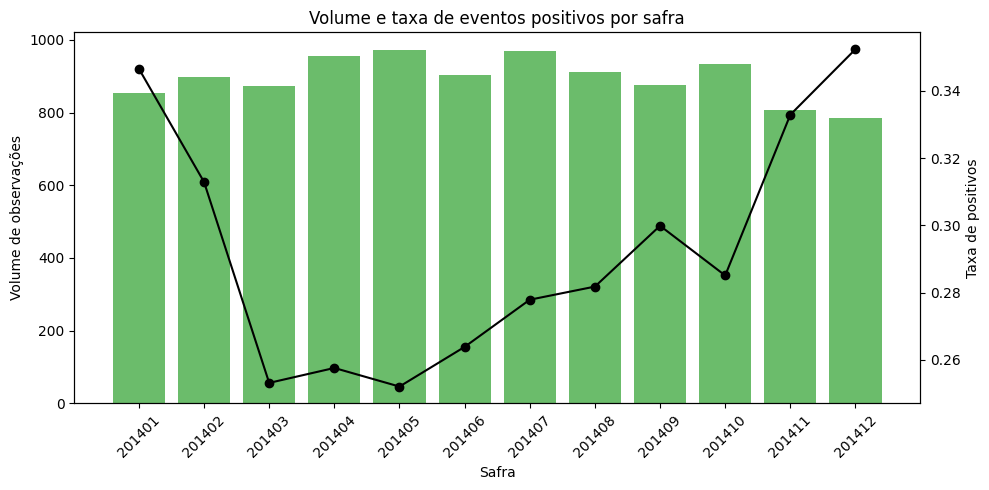

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df['safra'] = df['safra'].astype(str)

temporal = (
    df.groupby('safra')
      .agg(
          volume=('y', 'count'),
          taxa_positivos=('y', 'mean')
      )
      .reset_index()
      .sort_values('safra')
)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Barras: volume
ax1.bar(temporal['safra'], temporal['volume'], alpha=0.7, color='tab:green')
ax1.set_ylabel('Volume de observações')
ax1.set_xlabel('Safra')
ax1.tick_params(axis='x', rotation=45)

# Linha: taxa de positivos
ax2 = ax1.twinx()
ax2.plot(temporal['safra'], temporal['taxa_positivos'], marker='o', color='black')
ax2.set_ylabel('Taxa de positivos')

plt.title('Volume e taxa de eventos positivos por safra')
plt.tight_layout()
plt.show()


Observa-se que o volume de observações por safra se mantém relativamente estável ao longo do período analisado. Em contrapartida, a proporção de eventos positivos apresenta variações ao longo do tempo, comportamento esperado em bases de crédito, dado que o risco é influenciado por fatores econômicos e de perfil dos clientes.

Esse cenário reforça a importância da utilização de uma divisão temporal dos dados, permitindo avaliar o desempenho do modelo em contextos distintos e mais próximos da aplicação real.

#### #3 Verificação de valores nulos
Nesta etapa é realizada a análise da presença de valores nulos nas variáveis preditoras, por meio do cálculo da taxa de valores ausentes em cada coluna. Essa verificação é fundamental para definir estratégias adequadas de tratamento dos dados, como imputação ou exclusão de variáveis, considerando o impacto na estabilidade e no desempenho do modelo.

In [ ]:
missing = (
    df.isnull()
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)
missing.columns = ['variavel', 'missing_pct']
missing.T 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
variavel,VAR_62,VAR_70,VAR_61,VAR_49,VAR_36,VAR_63,VAR_43,VAR_12,VAR_18,VAR_21,VAR_16,VAR_47,VAR_75,VAR_41,VAR_56,VAR_55,VAR_68,VAR_50,VAR_48,VAR_67,VAR_37,VAR_29,VAR_27,VAR_31,VAR_42,VAR_46,VAR_77,VAR_69,VAR_66,VAR_23,VAR_10,VAR_14,VAR_26,VAR_51,VAR_73,VAR_71,VAR_78,VAR_74,VAR_13,VAR_39,VAR_45,VAR_15,VAR_52,VAR_11,VAR_35,VAR_34,VAR_8,VAR_7,VAR_38,VAR_76,VAR_59,VAR_17,VAR_5,VAR_24,VAR_58,VAR_65,VAR_53,VAR_54,VAR_1,VAR_3,VAR_2,VAR_4,VAR_6,VAR_72,VAR_22,VAR_28,VAR_44,VAR_33,VAR_40,VAR_19,VAR_25,VAR_30,id,VAR_9,y,safra,VAR_20,VAR_32,VAR_57,VAR_60,VAR_64
missing_pct,0.7801,0.7691,0.7132,0.6795,0.6768,0.6747,0.6702,0.6702,0.6633,0.6633,0.6619,0.6617,0.6541,0.6541,0.6439,0.6389,0.6155,0.6155,0.5953,0.5721,0.5690,0.5536,0.5526,0.5430,0.5366,0.5263,0.5183,0.5183,0.5183,0.5183,0.5183,0.5160,0.5160,0.5160,0.5160,0.5160,0.5160,0.5160,0.4859,0.4859,0.4859,0.4707,0.4707,0.4641,0.4641,0.4501,0.4501,0.4314,0.4314,0.4238,0.4238,0.4192,0.3781,0.3781,0.3781,0.2085,0.1638,0.1187,0.0387,0.0387,0.0387,0.0387,0.0085,0.0085,0.0057,0.0057,0.0057,0.0057,0.0057,0.0057,0.0057,0.0045,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


#### #4 Considerações Finais - Analise exploratória

A variável target apresenta uma taxa de eventos positivos de aproximadamente 30%, caracterizando uma distribuição assimétrica. Esse comportamento é esperado em bases de crédito, especialmente em problemas de previsão de inadimplência, e reforça a escolha de métricas como AUC, KS e Gini para a avaliação do desempenho do modelo, em detrimento de métricas como acurácia.

Observou-se também um comportamento relativamente estável dos dados ao longo das safras analisadas, apesar de termos um comportamento instável para a variável target. Esse resultado reforça a adoção de uma separação temporal dos dados para o desenvolvimento e validação do modelo, mitigando riscos de vazamento de informação e aproximando a avaliação de um cenário real de produção.

Por fim, foi identificada a presença de variáveis com elevada taxa de valores ausentes. Essas variáveis serão tratadas por meio de técnicas de imputação ou, quando apropriado, descartadas na etapa de pré-processamento, considerando seu impacto na performance e na estabilidade do modelo.
